<a href="https://colab.research.google.com/github/nicolaeee/IA---Google-Colab/blob/main/TemaUnu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:", path)

100%|██████████| 262M/262M [00:01<00:00, 152MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10


In [2]:
# ✅ CERINȚA: Import librării esențiale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Load dataset
df = pd.read_csv(path + "/vehicles.csv", low_memory=False)

# Afișăm primele rânduri
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
# ✅ CERINȚA: Preprocesare dataset
df = df[['price', 'year', 'odometer', 'manufacturer']]
df.dropna(inplace=True)

# Eliminăm anomalii
df = df[(df['price'] > 500) & (df['price'] < 200000)]
df = df[(df['year'] > 1990) & (df['year'] < 2023)]
df = df[(df['odometer'] > 0) & (df['odometer'] < 400000)]

df.head()


,price,year,odometer,manufacturer
27,33590,2014.0,57923.0,gmc
28,22590,2010.0,71229.0,chevrolet
29,39590,2020.0,19160.0,chevrolet
30,30990,2017.0,41124.0,toyota
31,15000,2013.0,128000.0,ford


from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['odometer'].plot(kind='hist', bins=20, title='odometer')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('manufacturer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='year', y='odometer', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('manufacturer')):
  _plot_series(series, series_name, i)
  fig.legend(title='manufacturer', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['odometer']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('manufacturer')):
  _plot_series(series, series_name, i)
  fig.legend(title='manufacturer', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('odometer')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('manufacturer')):
  _plot_series(series, series_name, i)
  fig.legend(title='manufacturer', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['odometer'].plot(kind='line', figsize=(8, 4), title='odometer')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['manufacturer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='price', y='manufacturer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['manufacturer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='year', y='manufacturer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['manufacturer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='odometer', y='manufacturer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
# ✅ Encode manufacturer labels
df['manufacturer'] = df['manufacturer'].astype('category').cat.codes

X = df[['price', 'year', 'odometer']]
y = df['manufacturer']

# Train - Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Standardizare
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# ✅ CERINȚA: kNN standard (k=5)
knn_standard = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_standard.fit(X_train, y_train)

y_pred_std = knn_standard.predict(X_test)

print("🔹 Performanță kNN Standard")
print("Accuracy:", accuracy_score(y_test, y_pred_std))
print(classification_report(y_test, y_pred_std))


🔹 Performanță kNN Standard
Accuracy: 0.4809573478420207
              precision    recall  f1-score   support

           0       0.44      0.60      0.51      1120
           1       0.68      0.90      0.78       159
           2       0.29      0.67      0.40         3
           3       0.42      0.57      0.49      1407
           4       0.40      0.55      0.46      2553
           5       0.36      0.49      0.41       967
           6       0.42      0.49      0.45      1235
           7       0.45      0.58      0.51      9197
           8       0.33      0.39      0.36      1053
           9       0.40      0.43      0.42      2177
          10       0.77      0.91      0.83        11
          11       0.38      0.46      0.42       127
          12       0.52      0.58      0.55     12325
          13       0.55      0.50      0.52      2877
          14       0.22      0.19      0.21        21
          15       0.40      0.37      0.38      3830
          16       0.44  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# ✅ CERINȚA: kNN Weighted
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_weighted.fit(X_train, y_train)

y_pred_w = knn_weighted.predict(X_test)

print("🔹 Performanță kNN Weighted")
print("Accuracy:", accuracy_score(y_test, y_pred_w))
print(classification_report(y_test, y_pred_w))


🔹 Performanță kNN Weighted
Accuracy: 0.596425450342514
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1120
           1       0.84      0.94      0.88       159
           2       0.50      0.67      0.57         3
           3       0.64      0.65      0.64      1407
           4       0.60      0.61      0.61      2553
           5       0.58      0.58      0.58       967
           6       0.61      0.60      0.61      1235
           7       0.61      0.64      0.62      9197
           8       0.48      0.50      0.49      1053
           9       0.56      0.56      0.56      2177
          10       0.79      1.00      0.88        11
          11       0.52      0.55      0.53       127
          12       0.64      0.66      0.65     12325
          13       0.65      0.63      0.64      2877
          14       0.29      0.19      0.23        21
          15       0.50      0.49      0.50      3830
          16       0.54   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
acc_std = accuracy_score(y_test, y_pred_std)
acc_w = accuracy_score(y_test, y_pred_w)

print(f"Accuracy kNN Standard: {acc_std:.4f}")
print(f"Accuracy kNN Weighted: {acc_w:.4f}")

if acc_w > acc_std:
    print("\n✅ Weighted kNN are acuratețe mai mare — metoda alternativă este mai bună.")
else:
    print("\n⚠️ kNN Standard este mai bun în acest caz.")


Accuracy kNN Standard: 0.4810
Accuracy kNN Weighted: 0.5964

✅ Weighted kNN are acuratețe mai mare — metoda alternativă este mai bună.


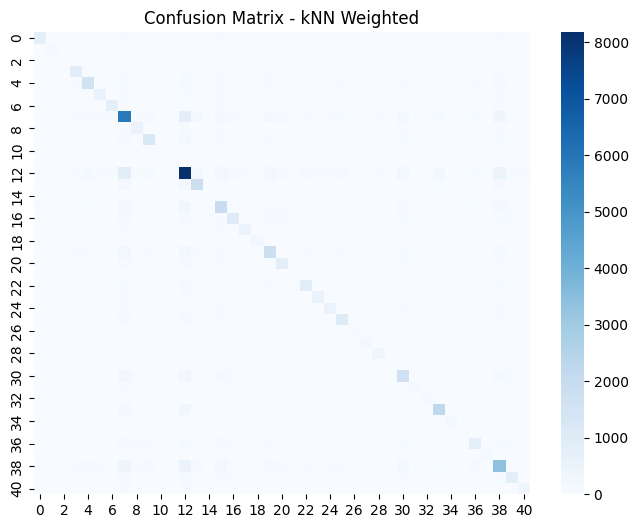

In [9]:
cm = confusion_matrix(y_test, y_pred_w)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt='', cmap='Blues')
plt.title("Confusion Matrix - kNN Weighted")
plt.show()
